In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [106]:
drinks = pd.read_parquet('drinks.parquet')
daily_volume = pd.read_parquet('daily_volume.parquet')
effect = pd.read_parquet('effect.parquet')
sales = pd.read_parquet('sales.parquet')
attack_probability = pd.read_parquet('attack_probability.parquet')
promo = pd.read_parquet('promo.parquet')

In [107]:
drinks.head()

,Напиток,Тип
0,Языкосвязывающий лимонный сквош,Безалкогольный
1,Сливочное пиво,Алкогольный
2,Шипучий персиковый чай,Безалкогольный
3,Чешуя дракона,Алкогольный
4,Эгног,Безалкогольный


In [108]:
drinks = drinks.rename(columns={'Напиток': 'product', 'Тип': 'drink'})

In [109]:
daily_volume.head()

,city,id,product,date,volume_litr
0,Коукворт,5429785,Эгног,1997-12-21,13.817442
1,Коукворт,6204483,Смородиновый ром,1997-12-21,2.744815
2,Авимор,8468669,Смородиновый ром,1997-12-21,0.625733
3,Литтл Уингинг,3750132,Огненный виски,1997-12-21,4.666352
4,Салем,7578185,Смородиновый ром,1997-12-21,0.185256


In [110]:
daily_volume.shape[0]

3778274

In [111]:
daily_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778274 entries, 0 to 3778273
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   city         object 
 1   id           int64  
 2   product      object 
 3   date         object 
 4   volume_litr  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 144.1+ MB


In [112]:
daily_volume['date'] = pd.to_datetime(daily_volume['date'])

In [113]:
daily_volume.isna().sum()

city           0
id             0
product        0
date           0
volume_litr    0
dtype: int64

In [114]:
daily_volume = daily_volume.merge(drinks, how='left', on=['product'])

In [115]:
daily_volume.head()

,city,id,product,date,volume_litr,drink
0,Коукворт,5429785,Эгног,1997-12-21,13.817442,Безалкогольный
1,Коукворт,6204483,Смородиновый ром,1997-12-21,2.744815,Алкогольный
2,Авимор,8468669,Смородиновый ром,1997-12-21,0.625733,Алкогольный
3,Литтл Уингинг,3750132,Огненный виски,1997-12-21,4.666352,Алкогольный
4,Салем,7578185,Смородиновый ром,1997-12-21,0.185256,Алкогольный


In [12]:
daily_volume.date.min()

Timestamp('1996-01-01 00:00:00')

In [13]:
daily_volume.date.max()

Timestamp('1997-12-31 00:00:00')

In [14]:
daily_volume.date.nunique() 

731

In [116]:
daily_volume = daily_volume.groupby(['city', 'date', 'drink'], as_index=False) \
                           .agg({'volume_litr': 'sum'})

In [117]:
daily_volume.head()

,city,date,drink,volume_litr
0,Абердин,1996-01-01,Алкогольный,1894.292999
1,Абердин,1996-01-01,Безалкогольный,141.007667
2,Абердин,1996-01-02,Алкогольный,2915.591362
3,Абердин,1996-01-02,Безалкогольный,298.747532
4,Абердин,1996-01-03,Алкогольный,3502.206836


<AxesSubplot:xlabel='date'>

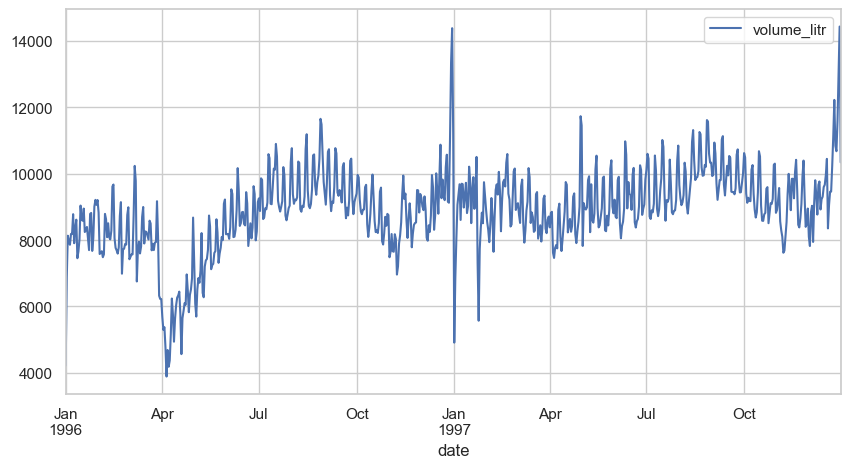

In [118]:
sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)})
ax_daily_volume = daily_volume.query('city == "Авимор"') \
                              .groupby(['date']) \
                              .agg({'volume_litr': 'sum'}) \
                              .sort_values('date')
ax_daily_volume.plot()

<AxesSubplot:xlabel='date'>

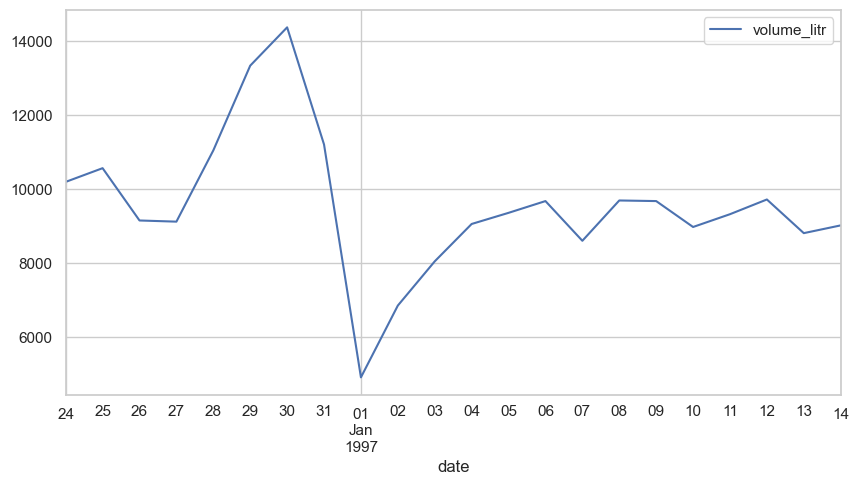

In [119]:
sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)})
ax_daily_volume = daily_volume.query('city == "Авимор" and date > "1996-12-23" and date < "1997-01-15"') \
                              .groupby(['date']) \
                              .agg({'volume_litr': 'sum'}) \
                              .sort_values('date')
ax_daily_volume.plot()

In [120]:
effect.head()

,date,product,city,volume_litr
0,1997-02-06,Огненный виски,Нью-Йорк,73.812644
1,1997-02-06,Смородиновый ром,Нью-Йорк,10.502700
2,1997-02-06,Огненный виски,Кромер,134.363871
3,1997-02-06,Безалкогольное,Авимор,5.823788
4,1997-02-06,Вода,Лондон,60.879819


In [23]:
effect.shape[0]

48942

In [24]:
effect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48942 entries, 0 to 48941
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         48942 non-null  object 
 1   product      48942 non-null  object 
 2   city         45138 non-null  object 
 3   volume_litr  48942 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [121]:
effect['date'] = pd.to_datetime(effect['date'])

In [122]:
effect[effect.isnull().values==True]

,date,product,city,volume_litr
65,1996-02-10,Безалкогольное,None,0.0
108,1996-12-30,Чешуя дракона,None,0.0
112,1996-08-14,Вода,None,0.0
145,1997-01-03,Сливочное пиво,None,0.0
147,1996-10-04,Вода,None,0.0
...,...,...,...,...
48879,1997-07-23,Огненный виски,None,0.0
48889,1997-07-24,Чешуя дракона,None,0.0
48897,1997-07-23,Сливочное пиво,None,0.0
48915,1997-07-21,Чешуя дракона,None,0.0


In [27]:
effect.date.min()

Timestamp('1996-01-01 00:00:00')

In [28]:
effect.date.max()

Timestamp('1997-12-31 00:00:00')

In [29]:
effect.date.nunique() 

716

<AxesSubplot:xlabel='date'>

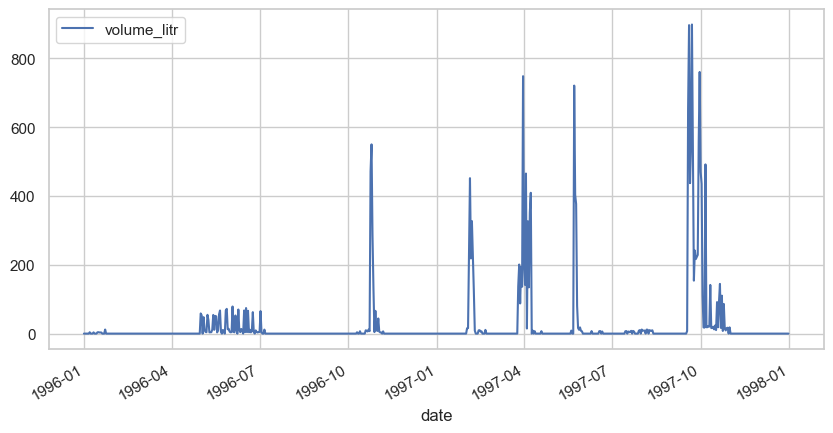

In [123]:
ax_effect = effect.query('city == "Авимор"') \
                  .groupby(['date']) \
                  .agg({'volume_litr': 'sum'}) \
                  .sort_values('date')
ax_effect.plot()

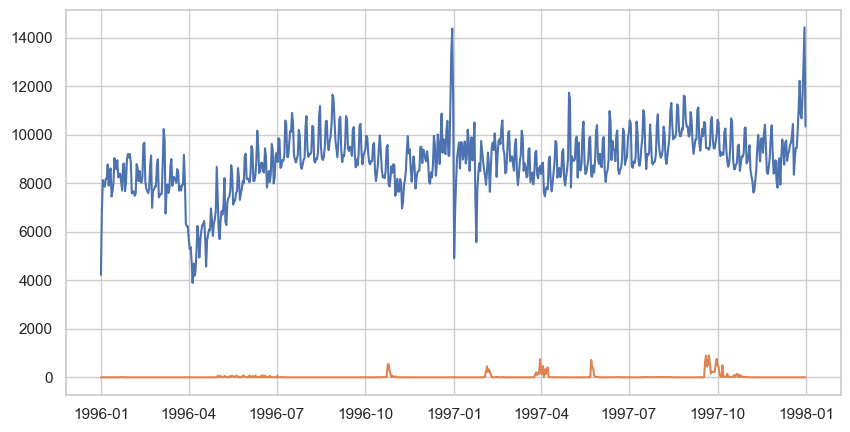

In [124]:
ax_daily_volume = daily_volume.query('city == "Авимор"') \
                              .groupby(['date']) \
                              .agg({'volume_litr': 'sum'}) \
                              .sort_values('date')

ax_effect = effect.query('city == "Авимор"') \
                  .groupby(['date']) \
                  .agg({'volume_litr': 'sum'}) \
                  .sort_values('date')

pylab.subplot()
pylab.plot(ax_daily_volume)
pylab.plot(ax_effect)

pylab.show()

In [125]:
effect_by_date = effect.groupby(['city', 'date'], as_index=False) \
                       .agg({'volume_litr': 'sum'}) \
                       .pivot(index='date', columns='city', values='volume_litr') \
                       .reset_index()

In [38]:
effect_by_date

city,date,Абердин,Авимор,Бат,Даффтаун,Коукворт,Кромер,Литтл Уингинг,Лондон,Нью-Йорк,Париж,Салем
0,1996-01-01,0.000032,0.000050,0.000187,0.241690,0.000095,0.531672,0.000037,0.000045,0.000039,0.000029,0.000091
1,1996-01-02,0.062361,0.000053,0.000231,0.000113,0.000112,0.000111,0.000045,0.000069,0.041038,0.000056,0.000076
2,1996-01-03,0.013154,0.000099,0.000112,0.000099,0.000080,0.000077,0.000056,0.000076,0.089007,0.427892,0.000111
3,1996-01-04,0.000059,0.000106,0.000117,0.000161,0.000130,0.000141,0.000110,0.000097,0.166863,0.000174,0.000118
4,1996-01-05,0.016368,0.000328,0.000102,0.000390,0.000201,1.039339,0.000096,0.000076,0.178117,0.000072,0.000118
...,...,...,...,...,...,...,...,...,...,...,...,...
711,1997-12-27,0.000136,0.000161,0.000153,0.000129,0.000168,0.000121,0.000195,0.000120,0.000141,0.000131,0.000165
712,1997-12-28,0.000147,0.000163,0.000161,0.000127,0.000175,0.000131,0.000184,0.000119,0.000141,0.000137,0.000166
713,1997-12-29,0.000138,0.000168,0.000152,0.000124,0.000168,0.000127,0.000194,0.000121,0.000139,0.000139,0.000160
714,1997-12-30,0.000137,0.000155,0.000140,0.000128,0.000156,0.000124,0.000163,0.000118,0.000136,0.000129,0.000147


In [126]:
sales.head()

,date,drink,city,segment,volume_litr
0,1996-01-01,Безалкогольные,Коукворт,Орден Феникса,3.762379
1,1996-01-01,Алкогольные,Литтл Уингинг,Пожиратели смерти,17.377532
2,1996-01-01,Алкогольные,Абердин,Орден Феникса,41.229288
3,1996-01-01,Алкогольные,Коукворт,Орден Феникса,116.523241
4,1996-01-01,Алкогольные,Коукворт,Пожиратели смерти,12.651664


In [40]:
sales.shape[0]

32164

In [108]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32164 entries, 0 to 32163
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         32164 non-null  datetime64[ns]
 1   drink        32164 non-null  object        
 2   city         32164 non-null  object        
 3   segment      32164 non-null  object        
 4   volume_litr  32164 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.2+ MB


In [127]:
sales['date'] = pd.to_datetime(sales['date'])

In [109]:
sales.date.nunique()

731

In [110]:
sales.volume_litr.sum()

1994613.2305577036

In [111]:
daily_volume.volume_litr.sum()

82371085.64111032

In [113]:
sales.segment.unique()

array(['Орден Феникса', 'Пожиратели смерти'], dtype=object)

In [128]:
attack_probability.head()

,Unnamed: 0,city,date,attack probability
0,0,Коукворт,1996-02-23,0.163317
1,1,Коукворт,1996-02-24,0.219221
2,2,Коукворт,1996-02-25,0.180625
3,3,Коукворт,1996-02-26,0.149749
4,4,Коукворт,1996-02-27,0.121288


In [129]:
attack_probability = attack_probability.rename(columns={'attack probability': 'attack_probability'})

In [120]:
attack_probability.shape[0]

3685

In [121]:
attack_probability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3685 non-null   int64  
 1   city                3685 non-null   object 
 2   date                3685 non-null   object 
 3   attack_probability  3685 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 115.3+ KB


In [130]:
attack_probability['date'] = pd.to_datetime(attack_probability['date'])

In [122]:
attack_probability.date.nunique()

335

In [76]:
attack_probability.date.min()

'1996-02-23'

In [77]:
attack_probability.date.max()

'1997-01-22'

In [131]:
attack_probability_for_corr = attack_probability.groupby(['city', 'date'], as_index=False) \
                                                .agg({'attack_probability':'sum'})
effect_for_corr = effect.groupby(['city', 'date'], as_index=False) \
                        .agg({'volume_litr':'sum'})
corr = attack_probability_for_corr.merge(effect_for_corr, how='left', on=['date', 'city'])

Text(0, 0.5, 'Объем эффекта в дополнительных литрах')

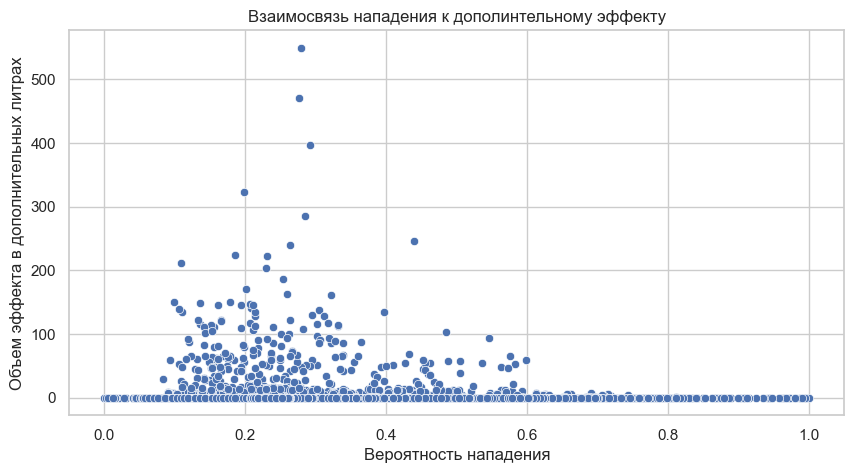

In [132]:
sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)})
sns.scatterplot(x = 'attack_probability', y = 'volume_litr', data = corr)
plt.title('Взаимосвязь нападения к дополинтельному эффекту')
plt.xlabel('Вероятность нападения')
plt.ylabel('Объем эффекта в дополнительных литрах')

In [133]:
promo.head()

,Название,Начало,Конец,Кромер,Париж,Бат,Лондон,Салем,Коукворт,Авимор,Даффтаун,Абердин,Нью-Йорк,Литтл Уингинг,Алкогольное,Безалкогольное,"Затраты на акцию, галлеонов"
0,Турнир трех волшебников за метлы,1996-03-02,1996-04-05,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,78215.000000
1,Клинок за пророк,1997-03-09,1997-04-18,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,60914.023417
2,Квоффл в кольцо,1997-06-11,1997-07-25,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,56.398993
3,None,1996-01-01,1996-02-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1292.139684
4,Конфетки за метки,1996-04-04,1996-04-30,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,36958.812310


In [134]:
promo['Начало'] = pd.to_datetime(promo['Начало'])

In [135]:
promo['Конец'] = pd.to_datetime(promo['Конец'])

In [136]:
promo = promo.rename(columns={'Затраты на акцию, галлеонов': 'Затраты_на_акцию_галлеонов'})

In [151]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Название                     61 non-null     object 
 1   Начало                       65 non-null     object 
 2   Конец                        65 non-null     object 
 3   Кромер                       65 non-null     float64
 4   Париж                        65 non-null     float64
 5   Бат                          65 non-null     float64
 6   Лондон                       65 non-null     float64
 7   Салем                        65 non-null     float64
 8   Коукворт                     65 non-null     float64
 9   Авимор                       65 non-null     float64
 10  Даффтаун                     65 non-null     float64
 11  Абердин                      65 non-null     float64
 12  Нью-Йорк                     65 non-null     float64
 13  Литтл Уингинг         

In [137]:
promo = promo.sort_values('Начало')

In [138]:
promo.head()

,Название,Начало,Конец,Кромер,Париж,Бат,Лондон,Салем,Коукворт,Авимор,Даффтаун,Абердин,Нью-Йорк,Литтл Уингинг,Алкогольное,Безалкогольное,Затраты_на_акцию_галлеонов
3,None,1996-01-01,1996-02-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1292.139684
24,None,1996-01-13,1996-01-26,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN
25,Минус кнат алкогольное,1996-01-31,1996-02-25,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN
29,С литрушки на лягушку скидка на безалкогольные...,1996-02-07,1996-03-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2799.590233
28,Скидка на Сливочное пиво 2 кната если на барм...,1996-02-07,1996-02-21,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN


In [139]:
promo.query('Начало > "1996-12-01" and Начало < "1997-02-01"')

,Название,Начало,Конец,Кромер,Париж,Бат,Лондон,Салем,Коукворт,Авимор,Даффтаун,Абердин,Нью-Йорк,Литтл Уингинг,Алкогольное,Безалкогольное,Затраты_на_акцию_галлеонов
17,Партнер заведений магазин Ханидьюкс 1997,1996-12-21,1997-05-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,742.228731
63,Акция при поимке Пикси от 15 литров напитков,1996-12-21,1997-01-21,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN
41,С литрушки на лягушку,1997-01-01,1997-01-31,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN
18,Партнер заведений магазин Ханидьюкс,1997-01-15,1997-05-31,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000


In [140]:
promo.query('Затраты_на_акцию_галлеонов > 0')

,Название,Начало,Конец,Кромер,Париж,Бат,Лондон,Салем,Коукворт,Авимор,Даффтаун,Абердин,Нью-Йорк,Литтл Уингинг,Алкогольное,Безалкогольное,Затраты_на_акцию_галлеонов
3,None,1996-01-01,1996-02-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.292140e+03
29,С литрушки на лягушку скидка на безалкогольные...,1996-02-07,1996-03-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.799590e+03
30,Библиотеки Куокворта читательский скидка,1996-02-19,1996-04-30,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.799245e+01
56,Библиотеки Куокворта купоны на скидку,1996-03-01,1996-04-30,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,4.819502e+01
55,"""Министерство магии"" только на алкоголь",1996-03-01,1996-04-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.091229e+02
0,Турнир трех волшебников за метлы,1996-03-02,1996-04-05,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.821500e+04
4,Конфетки за метки,1996-04-04,1996-04-30,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.695881e+04
31,С литрушки на лягушку 12 литров,1996-05-01,1996-07-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.097433e+02
32,С литрушки на лягушку + Карликовые пушистики,1996-06-01,1996-07-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,5.132836e+01
5,Обмен любезностями,1996-06-01,1996-06-30,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3.895229e+00


In [141]:
effect_by_date.query('date > "1996-02-06" and date < "1996-05-01"')

city,date,Абердин,Авимор,Бат,Даффтаун,Коукворт,Кромер,Литтл Уингинг,Лондон,Нью-Йорк,Париж,Салем
37,1996-02-07,0.000171,0.000227,0.000205,0.000221,0.000194,0.000208,0.000191,0.000194,0.000180,0.000198,0.000196
38,1996-02-08,0.011210,0.000199,0.000205,0.000177,0.000220,0.000264,0.000185,0.000215,0.000178,0.000214,0.000213
39,1996-02-09,0.065838,0.000191,0.000244,0.000225,0.000192,0.000298,0.000221,0.000196,0.000226,0.000227,0.000213
40,1996-02-10,0.054505,0.000202,0.000222,0.000215,0.000239,0.000239,0.000199,0.000183,0.000166,0.000214,0.000216
41,1996-02-11,0.000236,0.000255,0.000226,0.000261,0.000241,0.000211,0.000193,0.000184,0.000191,0.000223,0.000225
...,...,...,...,...,...,...,...,...,...,...,...,...
116,1996-04-26,0.000014,0.000015,0.000015,0.000013,0.000015,0.000015,0.000015,0.000014,0.000014,0.000014,0.000015
117,1996-04-27,0.000014,0.000016,0.000015,0.000013,0.000015,0.000016,0.000016,0.000014,0.000014,0.000014,0.000015
118,1996-04-28,0.000014,0.000016,0.000015,0.000013,0.000015,0.000015,0.000016,0.000014,0.000014,0.000014,0.000016
119,1996-04-29,0.000014,0.000016,0.000015,0.000013,0.000015,0.000015,0.000016,0.000014,0.000014,0.000014,0.000015
